In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.stats import linregress
from scipy.integrate import quad
from scipy.optimize import curve_fit

n = [10, 50, 100, 200]
tau = np.array([0.01, 0.05, 0.1,
                0.3, 0.5, 0.7, 0.9,
                0.91, 0.95, 0.99])
M = 1000
mu = 120
sigma = 15
rmse_array = [0, 0, 0, 0]
p_ls_array = [0, 0, 0, 0]
np_ls_array = [0, 0, 0, 0]

def calculate_performance(M, n, mu, sigma, tau):
    qstar = norm.ppf(tau, mu, sigma)
    rmse_np_values = []
    rmse_p_values = []

    ls_np_values = []
    ls_p_values = []

    for _ in range(M):
        data = norm.rvs(size=n, loc=mu, scale=sigma)
        yn = data[n-1]

        # parametric
        sample_mean = np.mean(data)
        sample_variance_unadj = np.var(data)
        qparam = norm.ppf(tau, sample_mean, np.sqrt(sample_variance_unadj))

        rmse_p_values.append(qparam - qstar)

        if qparam >= yn:
            ls_p_values.append(1)

        # non parametric
        qnonparam = get_order_statistic(data, int(np.ceil(tau * n)) - 1) # to improve

        rmse_np_values.append(qnonparam - qstar)

        if qnonparam >= yn:
            ls_np_values.append(1)

    rmse_np = np.sqrt(np.sum(np.square(rmse_np_values)) / M)
    rmse_p = np.sqrt(np.sum(np.square(rmse_p_values)) / M)
    rmse_ratio = rmse_np / rmse_p

    ls_p = np.sum(ls_p_values) / M
    ls_np = np.sum(ls_np_values) / M
    return ls_p, ls_np, rmse_ratio
#def calculate_rmse(qparam, qstar):


def get_order_statistic(data, order):
    return np.partition(np.asarray(data), order)[order]

for i in range(len(n)):
    p_subarray = []
    np_subarray = []
    rmse_subarray = []
    print("\n n = ", n[i], end = " ")


    for j in tau:
        print("\t \u03C4 = %.2f" %j, end = "\t")
        performance = calculate_performance(M, n[i], mu, sigma, j)
        rmse_subarray.append(performance[2])
        print("rmse = %.3f"%performance[2], end = "\n \t")
        p_subarray.append(performance[0])
        np_subarray.append(performance[1])
    rmse_array[i] = rmse_subarray
    p_ls_array[i] = p_subarray
    np_ls_array[i] = np_subarray



rmse = 1.218
 		 τ = 0.50	rmse = 1.217
 		 τ = 0.70	rmse = 1.231
 		 τ = 0.90	rmse = 1.277
 		 τ = 0.91	rmse = 1.267
 		 τ = 0.95	rmse = 1.408
 		 τ = 0.99	rmse = 1.835
 	
 n =  200 	 τ = 0.01	rmse = 2.280
 		 τ = 0.05	rmse = 1.390
 		 τ = 0.10	rmse = 1.234
 		 τ = 0.30	rmse = 1.265
 		 τ = 0.50	rmse = 1.245
 		 τ = 0.70	rmse = 1.187
 		 τ = 0.90	rmse = 1.295
 		 τ = 0.91	rmse = 1.241
 		 τ = 0.95	rmse = 1.331
 		 τ = 0.99	rmse = 1.762
 	
 n =  10 	 τ = 0.01	rmse = 1.606
 		 τ = 0.05	rmse = 1.177
 		 τ = 0.10	rmse = 1.517
 		 τ = 0.30	rmse = 1.280
 		 τ = 0.50	rmse = 1.281
 		 τ = 0.70	rmse = 1.244
 		 τ = 0.90	rmse = 1.264
 		 τ = 0.91	rmse = 1.356
 		 τ = 0.95	rmse = 1.209
 		 τ = 0.99	rmse = 1.622
 	
 n =  50 	 τ = 0.01	rmse = 1.689
 		 τ = 0.05	rmse = 1.304
 		 τ = 0.10	rmse = 1.307
 		 τ = 0.30	rmse = 1.232
 		 τ = 0.50	rmse = 1.273
 		 τ = 0.70	rmse = 1.222
 		 τ = 0.90	rmse = 1.246
 		 τ = 0.91	rmse = 1.276
 		 τ = 0.95	rmse = 1.356
 		 τ = 0.99	rmse = 1.672
 	
 n =  100 	 τ = 0

In [6]:
p_diff0 = [abs(p_ls_array[0] - tau)]
p_diff1 = [abs(p_ls_array[1] - tau)]
p_diff2 = [abs(p_ls_array[2] - tau)]
p_diff3 = [abs(p_ls_array[3] - tau)]
np_diff0 = [abs(np_ls_array[0] - tau)]
np_diff1 = [abs(np_ls_array[1] - tau)]
np_diff2 = [abs(np_ls_array[2]- tau)]
np_diff3 = [abs(np_ls_array[3] - tau)]

print(" \t parametric \t nonparametric")
print("\n n = 10   %.4f \t %.4f"%(np.mean(p_diff0), np.mean(np_diff0)))
print("\n n = 50   %.4f \t %.4f"%(np.mean(p_diff1), np.mean(np_diff1)))
print("\n n = 100  %.4f \t %.4f"%(np.mean(p_diff2), np.mean(np_diff2)))
print("\n n = 200  %.4f \t %.4f"%(np.mean(p_diff3), np.mean(np_diff3)))

 	 parametric 	 nonparametric

 n = 10   0.0059 	 0.0348

 n = 50   0.0067 	 0.0051

 n = 100  0.0094 	 0.0070

 n = 200  0.0044 	 0.0046
 	 parametric 	 nonparametric

 n = 10   0.0111 	 0.0289

 n = 50   0.0063 	 0.0110

 n = 100  0.0059 	 0.0049

 n = 200  0.0076 	 0.0060


In [7]:
p_diff01 = [abs(p_ls_array[0][0:3] - tau[0:3])]
p_diff02 = [abs(p_ls_array[0][3:7] - tau[3:7])]
p_diff03 = [abs(p_ls_array[0][7:10] - tau[7:10])]
p_diff11 = [abs(p_ls_array[1][0:3] - tau[0:3])]
p_diff12 = [abs(p_ls_array[1][3:7] - tau[3:7])]
p_diff13 = [abs(p_ls_array[1][7:10] - tau[7:10])]
p_diff21 = [abs(p_ls_array[2][0:3] - tau[0:3])]
p_diff22 = [abs(p_ls_array[2][3:7] - tau[3:7])]
p_diff23 = [abs(p_ls_array[2][7:10] - tau[7:10])]
p_diff31 = [abs(p_ls_array[3][0:3] - tau[0:3])]
p_diff32 = [abs(p_ls_array[3][3:7] - tau[3:7])]
p_diff33 = [abs(p_ls_array[3][7:10] - tau[7:10])]

np_diff01 = [abs(np_ls_array[0][0:3] - tau[0:3])]
np_diff02 = [abs(np_ls_array[0][3:7] - tau[3:7])]
np_diff03 = [abs(np_ls_array[0][7:10] - tau[7:10])]
np_diff11 = [abs(np_ls_array[1][0:3] - tau[0:3])]
np_diff12 = [abs(np_ls_array[1][3:7] - tau[3:7])]
np_diff13 = [abs(np_ls_array[1][7:10] - tau[7:10])]
np_diff21 = [abs(np_ls_array[2][0:3] - tau[0:3])]
np_diff22 = [abs(np_ls_array[2][3:7] - tau[3:7])]
np_diff23 = [abs(np_ls_array[2][7:10] - tau[7:10])]
np_diff31 = [abs(np_ls_array[3][0:3] - tau[0:3])]
np_diff32 = [abs(np_ls_array[3][3:7] - tau[3:7])]
np_diff33 = [abs(np_ls_array[3][7:10] - tau[7:10])]

print("\t \t \t \t parametric \t nonparametric")
print("\n n = 10   \u03C4 in [0.01, 0.1] \t %.5f \t %.5f"%(np.mean(p_diff01),np.mean(np_diff01)))
print("\t  \u03C4 in [0.3, 0.9] \t %.5f \t %.5f"%(np.mean(p_diff02),np.mean(np_diff02)))
print("\t  \u03C4 in [0.91, 0.99] \t %.5f \t %.5f"%(np.mean(p_diff03),np.mean(np_diff03)))
print("\n\n n = 50   \u03C4 in [0.01, 0.1] \t %.5f \t %.5f"%(np.mean(p_diff11),np.mean(np_diff11)))
print("\t  \u03C4 in [0.3, 0.9]  \t %.5f \t %.5f"%(np.mean(p_diff12),np.mean(np_diff12)))
print("\t  \u03C4 in [0.91, 0.99]\t %.5f \t %.5f"%(np.mean(p_diff13),np.mean(np_diff13)))
print("\n\n n = 100  \u03C4 in [0.01, 0.1]\t %.5f \t %.5f"%(np.mean(p_diff21),np.mean(np_diff21)))
print("\t  \u03C4 in [0.3, 0.9]\t %.5f \t %.5f"%(np.mean(p_diff22),np.mean(np_diff22)))
print("\t  \u03C4 in [0.91, 0.99]\t %.5f \t %.5f"%(np.mean(p_diff23),np.mean(np_diff23)))
print("\n\n n = 200  \u03C4 in [0.01, 0.1]\t %.5f \t %.5f"%(np.mean(p_diff31),np.mean(np_diff31)))
print("\t  \u03C4 in [0.3, 0.9] \t %.5f \t %.5f"%(np.mean(p_diff32),np.mean(np_diff32)))
print("\t  \u03C4 in [0.91, 0.99]\t %.5f \t %.5f"%(np.mean(p_diff33),np.mean(np_diff33)))

	 	 	 	 parametric 	 nonparametric

 n = 10   τ in [0.01, 0.1] 	 0.00567 	 0.04867
	  τ in [0.3, 0.9] 	 0.00725 	 0.01300
	  τ in [0.91, 0.99] 	 0.00433 	 0.05000


 n = 50   τ in [0.01, 0.1] 	 0.00533 	 0.00400
	  τ in [0.3, 0.9]  	 0.00725 	 0.00575
	  τ in [0.91, 0.99]	 0.00733 	 0.00533


 n = 100  τ in [0.01, 0.1]	 0.00900 	 0.00833
	  τ in [0.3, 0.9]	 0.01225 	 0.00900
	  τ in [0.91, 0.99]	 0.00600 	 0.00300


 n = 200  τ in [0.01, 0.1]	 0.00367 	 0.00500
	  τ in [0.3, 0.9] 	 0.00550 	 0.00450
	  τ in [0.91, 0.99]	 0.00367 	 0.00433
	 	 	 	 parametric 	 nonparametric

 n = 10   τ in [0.01, 0.1] 	 0.00833 	 0.03733
	  τ in [0.3, 0.9] 	 0.01600 	 0.00675
	  τ in [0.91, 0.99] 	 0.00733 	 0.05000


 n = 50   τ in [0.01, 0.1] 	 0.00467 	 0.01200
	  τ in [0.3, 0.9]  	 0.00775 	 0.00675
	  τ in [0.91, 0.99]	 0.00600 	 0.01567


 n = 100  τ in [0.01, 0.1]	 0.00167 	 0.00200
	  τ in [0.3, 0.9]	 0.00850 	 0.00750
	  τ in [0.91, 0.99]	 0.00667 	 0.00433


 n = 200  τ in [0.01, 0.1]	 0.00500

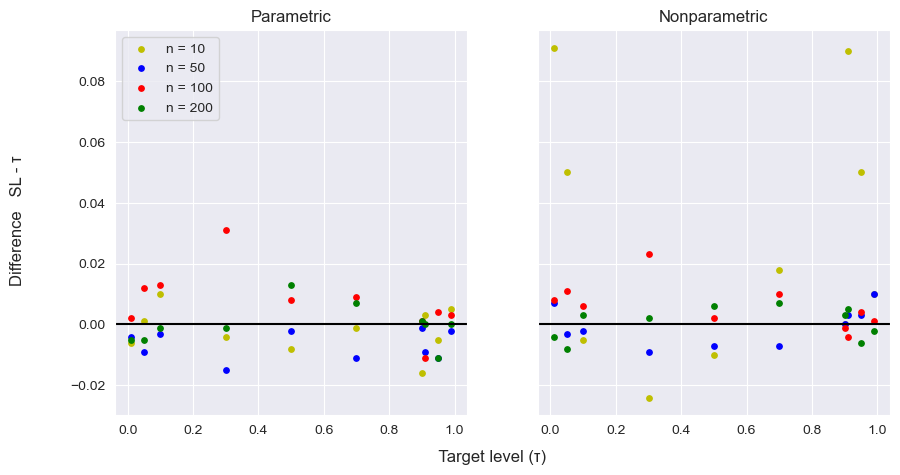

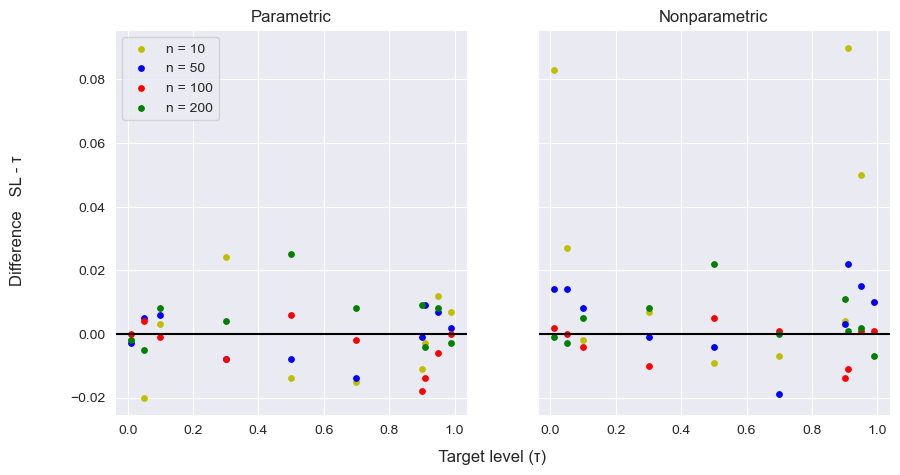

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(tau, p_ls_array[0]-tau, s=15, color = 'y', label='n = 10')
ax1.scatter(tau, p_ls_array[1]-tau, s=15, color ='b', label='n = 50')
ax1.scatter(tau, p_ls_array[2]-tau, s=15, color ='r', label='n = 100')
ax1.scatter(tau, p_ls_array[3]-tau, s=15, color = 'g', label='n = 200')
ax1.set_title("Parametric")
ax1.axhline(y=0, color = 'k')
ax2.scatter(tau, np_ls_array[0]-tau, s=15, color = 'y', label='n = 10')
ax2.scatter(tau, np_ls_array[1]-tau, s=15, color ='b', label='n = 50')
ax2.scatter(tau, np_ls_array[2]-tau, s=15, color ='r', label='n = 100')
ax2.scatter(tau, np_ls_array[3]-tau, s=15, color = 'g', label='n = 200')
ax2.set_title("Nonparametric")
ax2.axhline(y=0, color = 'k')

ax1.legend(loc='upper left')

fig.supylabel('Difference   SL - \u03C4')
fig.supxlabel("\n Target level (\u03C4)")

fig.set_size_inches(10, 5)
fig.savefig('Diff_SL.png', dpi=100)
plt.show()